## Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# importing the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Data Understanding and cleaning

In [2]:
#taking dataframe name as HPP(House Price Prediction)
HPP = pd.read_csv("train.csv")

In [3]:
HPP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
HPP.shape

(1460, 81)

In [5]:
HPP.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
HPP.isnull().all(axis=1).sum()

0

In [7]:
HPP.isnull().all(axis=0).sum()

0

In [8]:
#Information about column.
HPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Sepearting the numerical variable and Categorial variable



In [9]:
numerical_HPP = HPP.select_dtypes(include= ["int64","float64"])
catgorial_HPP = HPP.select_dtypes(include =["object"])

In [10]:
numerical_HPP.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
numerical_HPP.shape

(1460, 38)

## need to drop the categorial column from the numeric data frame as per Data dictionary
- such cloumns like "MSSubClass","OverallQual  etc.

In [12]:
#numerical_HPP = numerical_HPP.drop(["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","MoSold","YrSold"], axis= 1)
#numerical_HPP.head()

In [13]:
numerical_HPP.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
catgorial_HPP.shape

(1460, 43)

In [15]:
numerical_HPP.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
outlier_percentage ={}
for feature in numerical_HPP.columns:
    IQR = numerical_HPP[feature].quantile(0.75)- numerical_HPP[feature].quantile(0.25)
    outlier_count = numerical_HPP[(numerical_HPP[feature]> (numerical_HPP[feature].quantile(0.75)+1.5*IQR)) | (numerical_HPP[feature]< (numerical_HPP[feature].quantile(0.25)-1.5*IQR))].shape[0]
    outlier_percentage[feature]= round(outlier_count/numerical_HPP.shape[0]*100,2)
    
outlier_df = pd.DataFrame({"Features":list(outlier_percentage.keys()),"Percentage":list(outlier_percentage.values())})
outlier_df.sort_values(by = "Percentage",ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


## As per above table result below is the observation
- some column have high percentage level of outliers, and some have less.
- Droping of outlier can be cause loss of information.
- need to treat the max outlier with quantile(0.75)+1.5*IQR
- need to treat the min outlier with quantile(0.25)-1.5*IQR
- Here IQR =  quantile(0.75) -  quantile(0.25)
- its obvious we should not distrub the "salePrice" as this is Target variable of Model.

In [17]:
for feature,percentage in outlier_percentage.items():
    if feature != "SalePrice":
        IQR = HPP[feature].quantile(0.75)- HPP[feature].quantile(0.25)
        max_value = HPP[feature].quantile(0.75)+1.5*IQR
        min_value = HPP[feature].quantile(0.25)-1.5*IQR
        HPP[feature][HPP[feature]> max_value] = max_value
        HPP[feature][HPP[feature]< min_value] = min_value

In [18]:
HPP.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,0.0,0.0,0.0,0.0,0.0,10.000000,2010.000000,278000.000000
95%,1387.050000,145.000000,107.000000,17401.150000,8.000000,7.500000,2007.000000,2007.000000,415.000000,1274.000000,...,335.000000,170.000000,0.0,0.0,0.0,0.0,0.0,11.000000,2010.000000,326100.000000
99%,1445.410000,145.000000,111.500000,17673.500000,10.000000,7.500000,2009.000000,2009.000000,415.000000,1572.410000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,442567.010000


## As per above describe table its clearly showing there is no outlier present on Actual numeric column.

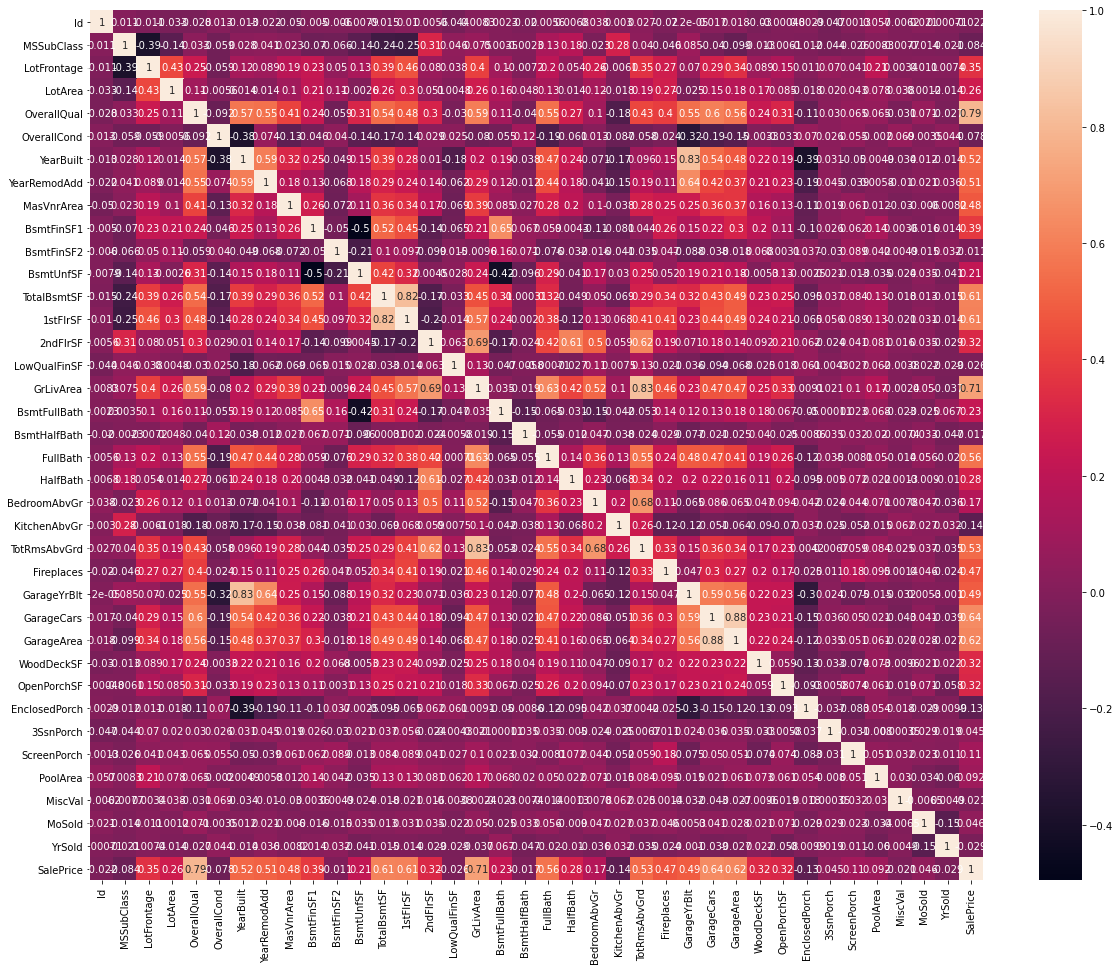

In [19]:
# Correlation of data in numeric Dataframe
plt.figure(figsize=(20,16))
sns.heatmap(numerical_HPP.corr(), annot= True)
plt.show()

## As per Above Heatmap
- TotalBsmtSF and 1stFlrSF has strong corrleation as 0.82
- GarageCars and GarageArea has strong correlation as 0.88
- TotRmsAbvgrd and GrLiveArea have 0.83
- GarageYrBlt and YearBlt have 0.83

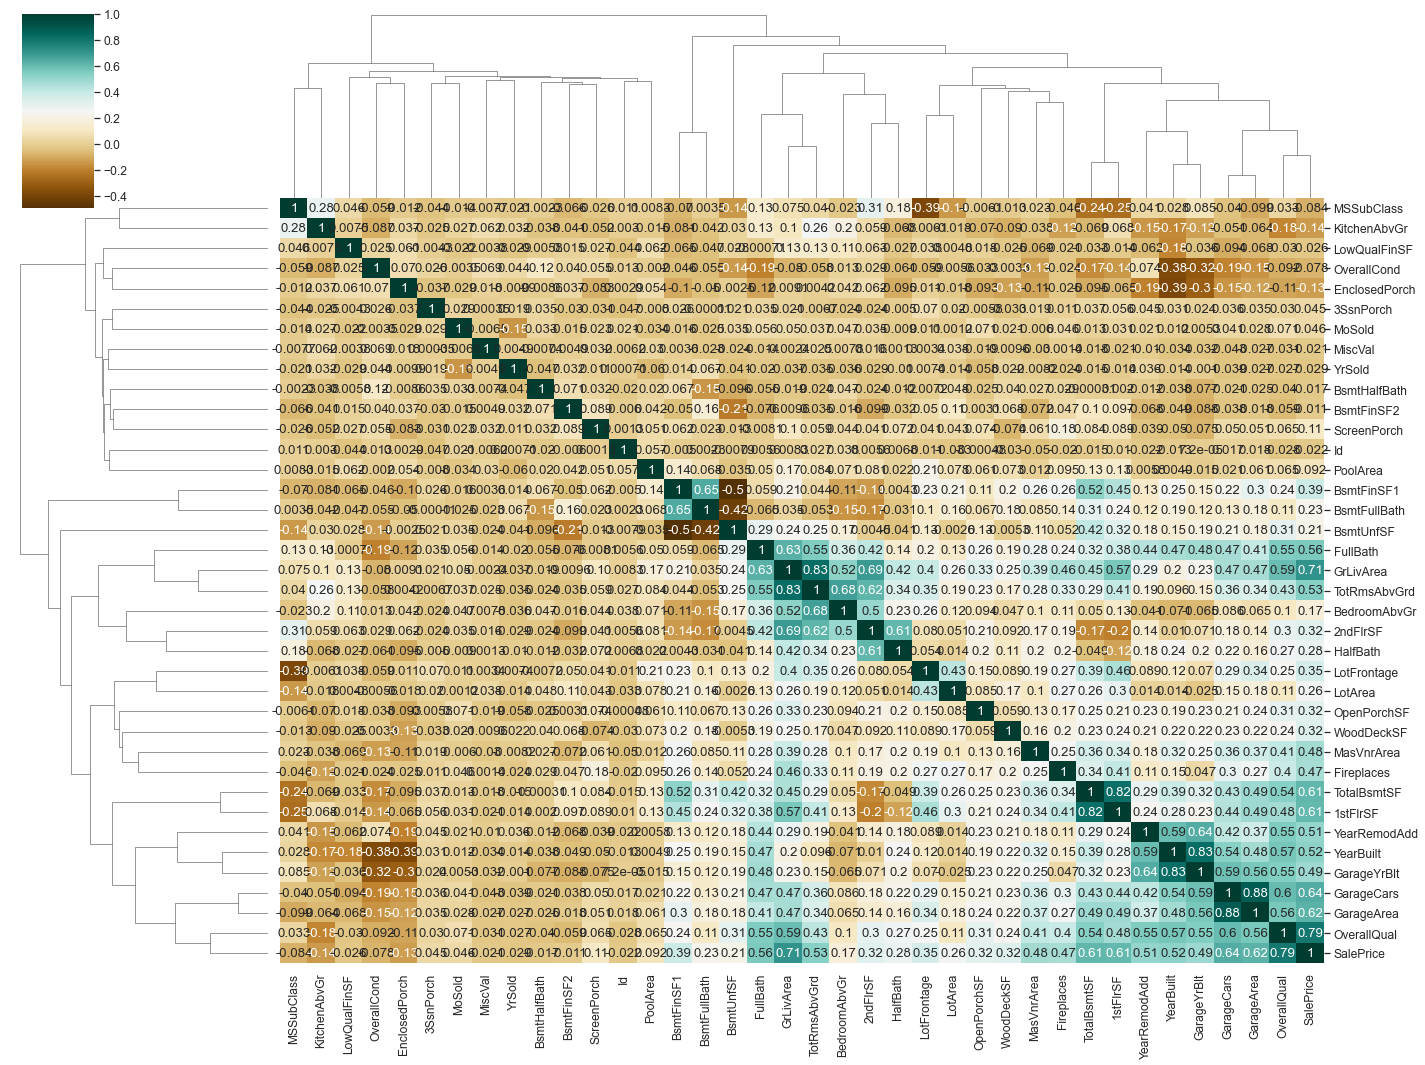

In [20]:
#we can see the coorelation through below dendogram as well.
house_correlation = numerical_HPP.corr()
sns.set(font_scale=1.1)
sns.clustermap(house_correlation,annot=True,figsize=(20, 15),cmap="BrBG")
plt.show()

## lets do univariate and Bivariate Analysis

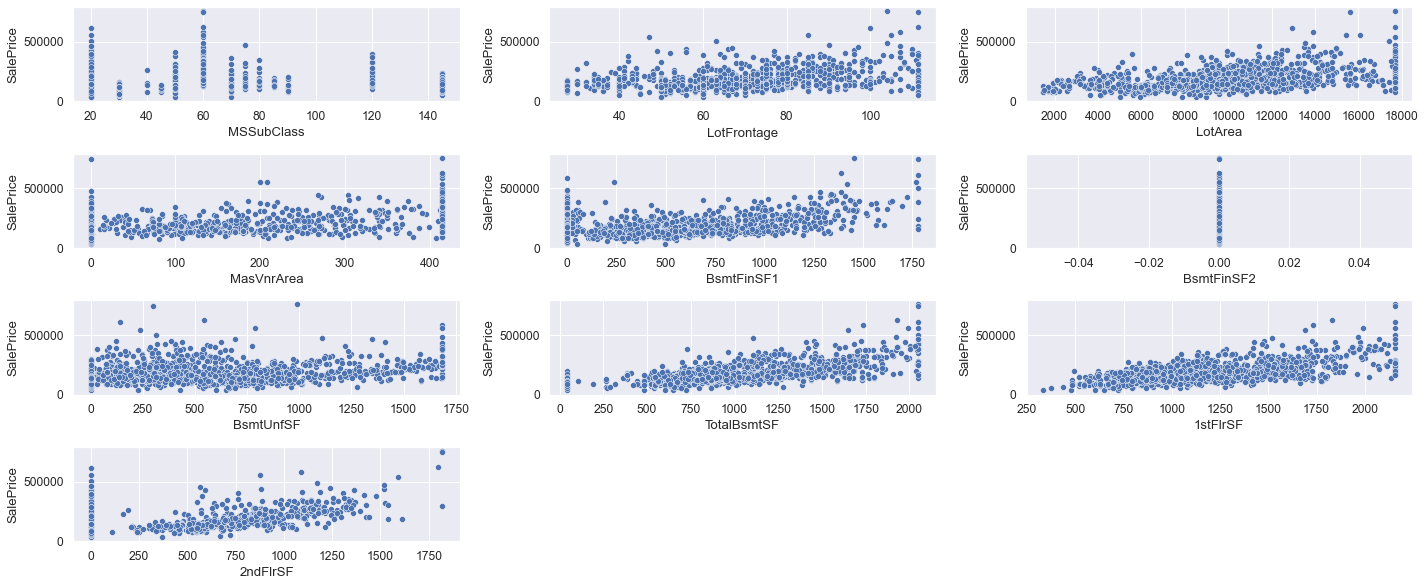

In [21]:
fig = plt.figure(figsize=(20,18))

for i, feature in enumerate(["MSSubClass","LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.scatterplot(HPP[feature],HPP["SalePrice"])
    plt.tight_layout()

## As per Above plot we can observed below point
- features like LotFrontage,LotArea,MasVnArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF, these all are showing positive correlation with SalePrice
- BsmtFinSF2 has constant variance, so this data can be dropped
- MSSubclass has decrete value as this is categorial variable.

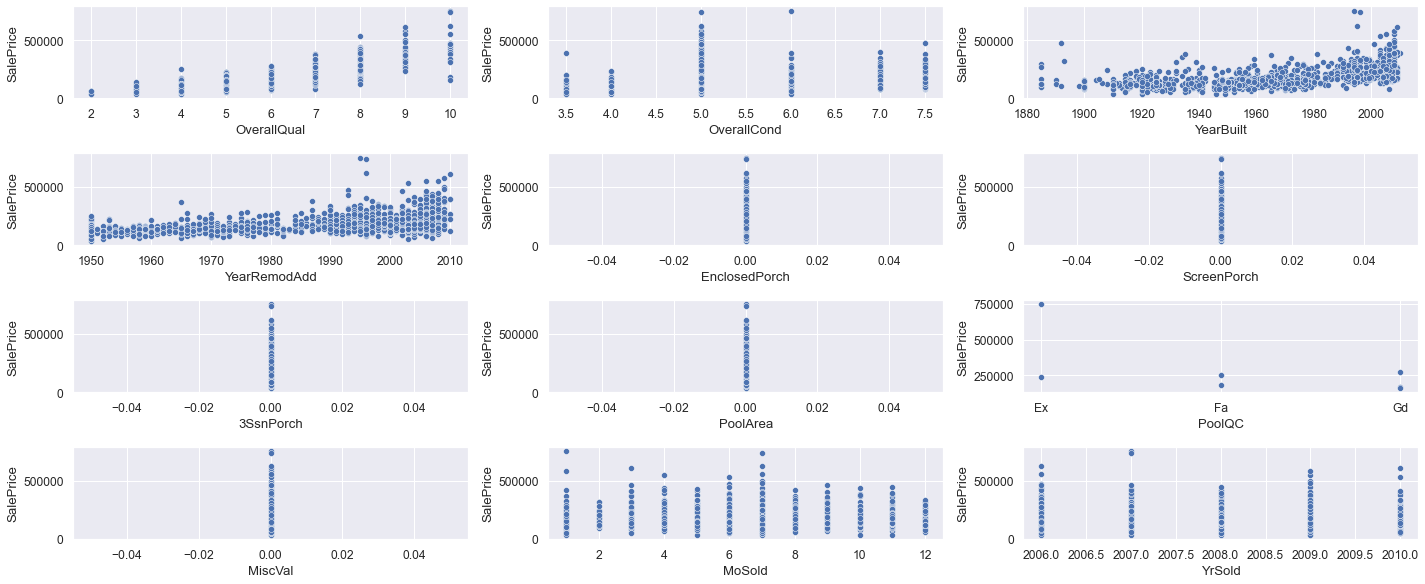

In [22]:
fig = plt.figure(figsize=(20,18))

for i, feature in enumerate(["OverallQual","OverallCond","YearBuilt","YearRemodAdd","EnclosedPorch","ScreenPorch","3SsnPorch","PoolArea","PoolQC","MiscVal","MoSold","YrSold"]):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.scatterplot(HPP[feature],HPP["SalePrice"])
    plt.tight_layout()

## As per Above Graph, will drop constant variance feature

In [23]:
HPP.drop(["BsmtFinSF2",'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],axis=1,inplace=True)
HPP.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF

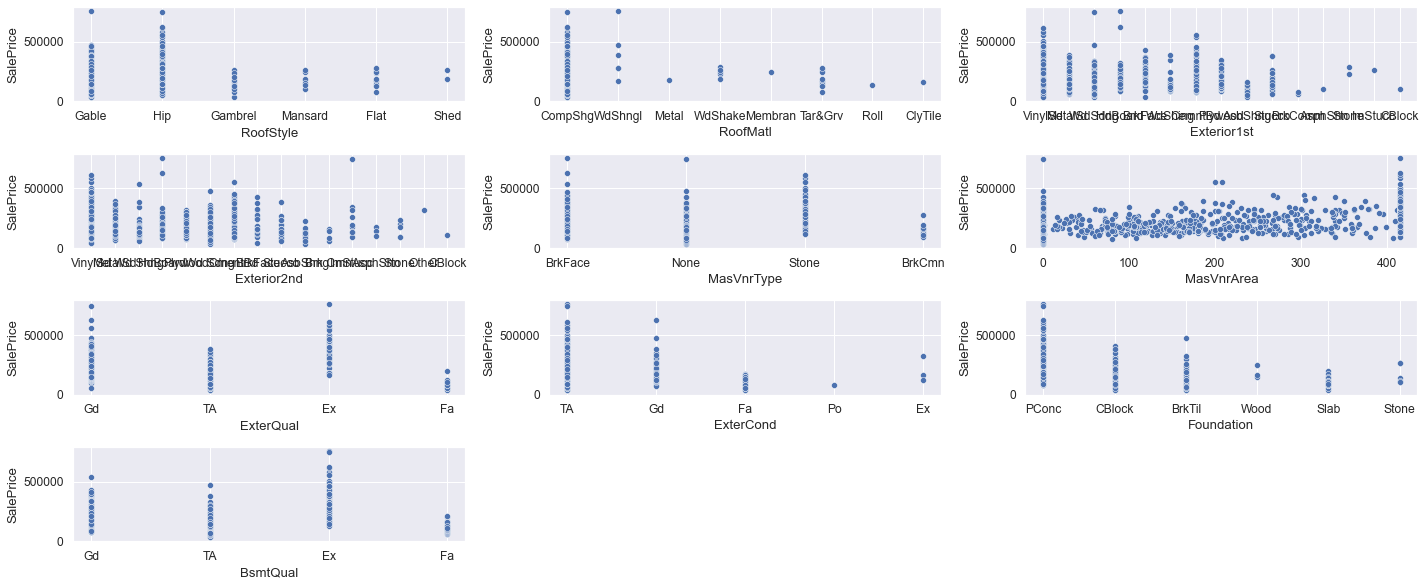

In [24]:
fig = plt.figure(figsize=(20,18))

for i, feature in enumerate(['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.scatterplot(HPP[feature],HPP["SalePrice"])
    plt.tight_layout()

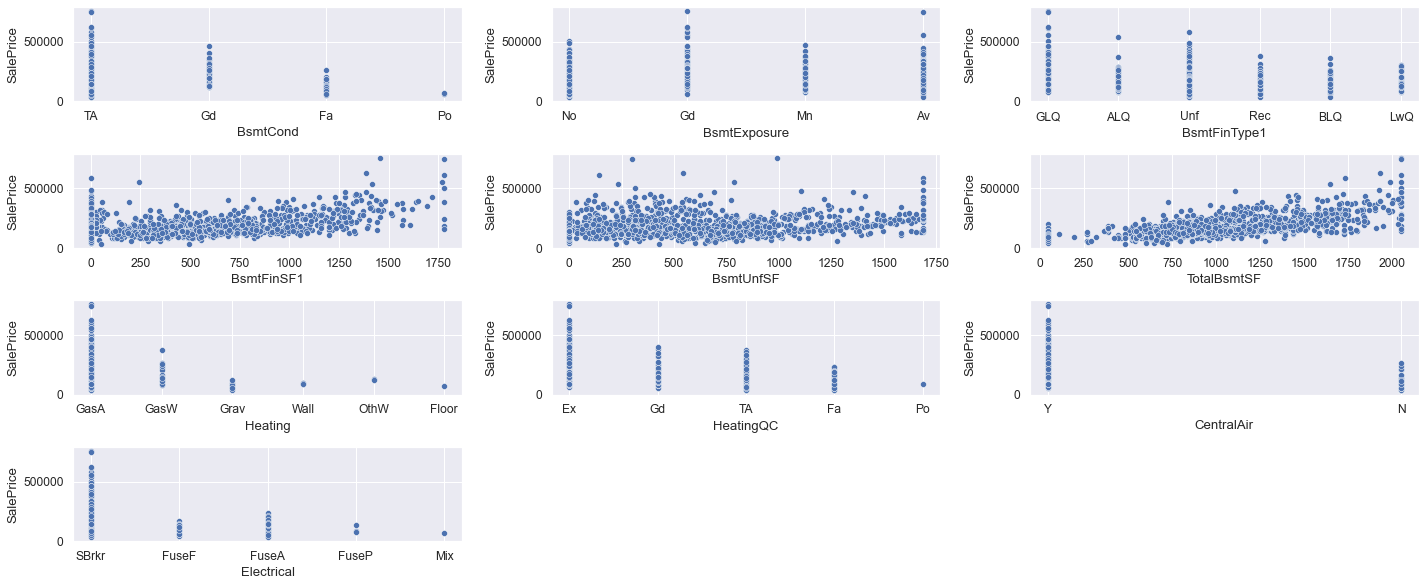

In [25]:
fig = plt.figure(figsize=(20,18))

for i, feature in enumerate(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating','HeatingQC', 'CentralAir', 'Electrical']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.scatterplot(HPP[feature],HPP["SalePrice"])
    plt.tight_layout()

In [26]:
HPP.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,6.487671,0.611301,1978.506164,1.765411,470.670719,91.806849,42.603425,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,1.541916,0.638959,24.689725,0.742753,207.105729,116.658120,52.501584,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,12.000000,2010.000000,755000.000000


## Analyzing categorial feature with the help of Bar graph to see clear visulization

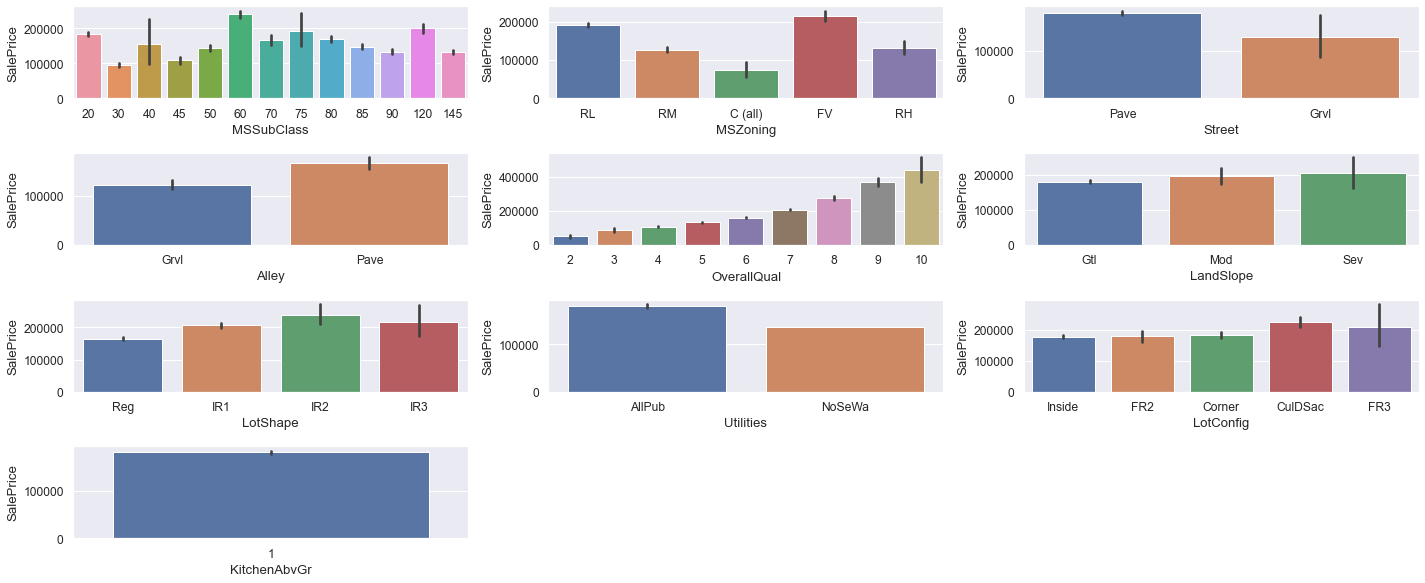

In [27]:
fig = plt.figure(figsize=(20,18))

for i, feature in enumerate(["MSSubClass",'MSZoning', 'Street', 'Alley', 'OverallQual', 'LandSlope',"LotShape","Utilities","LotConfig","KitchenAbvGr"]):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace = 3.0)
    sns.barplot(HPP[feature],HPP["SalePrice"])
    plt.tight_layout()

## As per Above graph The observation is
- MSSubclass value 60 have more salePrice
- salePrice increasing with respect to OverallQual.
- MsZoning value with FV have higher Price.
- AllPub Utilities have higher salePrice
- landSlope has almost in Equal price Range

In [28]:
HPP[["BsmtFullBath","KitchenAbvGr","GarageYrBlt","YearBuilt","YearRemodAdd"]].describe()

,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd
count,1460.000000,1460.0,1379.000000,1460.000000,1460.000000
mean,0.425000,1.0,1978.506164,1971.299315,1984.865753
std,0.517373,0.0,24.689725,30.108397,20.645407
min,0.000000,1.0,1900.000000,1885.000000,1950.000000
25%,0.000000,1.0,1961.000000,1954.000000,1967.000000
50%,0.000000,1.0,1980.000000,1973.000000,1994.000000
75%,1.000000,1.0,2002.000000,2000.000000,2004.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000


In [29]:
HPP["KitchenAbvGr"].value_counts()

1    1460
Name: KitchenAbvGr, dtype: int64

In [30]:
#Dropping KitchenAbvGr as all value is 1, hence no variance in Data.
HPP.drop(["KitchenAbvGr"],axis=1,inplace=True)

In [31]:
HPP[['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']].describe()
#HPP.describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1379.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1971.299315,1984.865753,2007.815753
std,24.689725,30.108397,20.645407,1.328095
min,1900.000000,1885.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1967.000000,2007.000000
50%,1980.000000,1973.000000,1994.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [32]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    HPP[feature] = 2022 - HPP[feature]

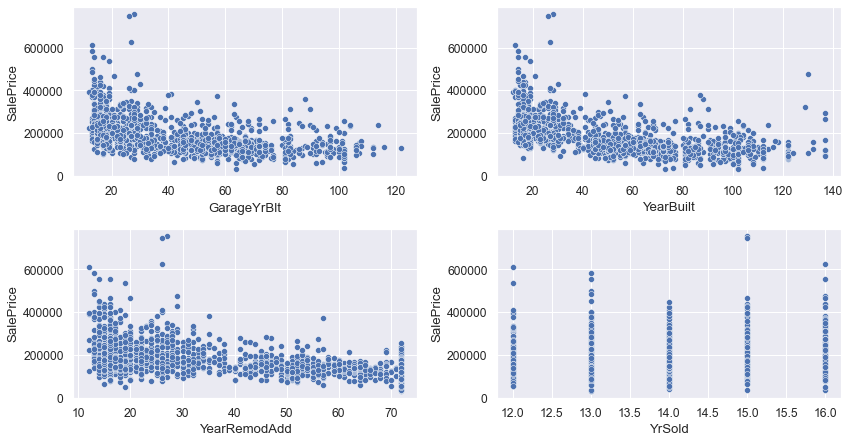

In [33]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(HPP[feature], HPP['SalePrice'])
    plt.tight_layout()

## As Per Above Graph.
- For most the realty properties Garage is built within last 20 years.
- SalePrice is more lower value of YearBuilt i.e. more recently build houses
- lower value of YearRemodAdd have higher SalePrice

## Starting Data cleaning and missing value Handling in Numerical feature

We've seen that there are some missing values in the dataset.

In [34]:
print("Feature : Percentage of Missing Value")
for feature in HPP.select_dtypes(exclude=['object']).columns:
    if HPP[feature].isnull().any():
        print(feature, ' : ',  round(HPP[feature].isnull().sum()/HPP.shape[0], 2)*100)
print("===================================================================")

Feature : Percentage of Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [35]:
# As MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice

HPP = HPP[~HPP['MasVnrArea'].isnull()]
HPP.drop(['Id'], axis=1, inplace=True)
numerical_HPP.drop(['Id'], axis=1, inplace=True)

In [36]:
# As mentioned above in HeatMap analysis, there are some data have strong correlation, hence droping.
HPP.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

HPP.columns.shape

(69,)

## Analyzing Categorical Features
- As in initially have seperate categorial column, will start exploring one by one.

In [37]:
# Categorical features in the dataframe
catgorial_HPP.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Missing Value Handling - Categorical Features

In [38]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feature in HPP.select_dtypes(include=['object']).columns:
    if HPP[feature].isnull().any():
        print(feature, ':', round(HPP[feature].isnull().sum()/HPP.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 94.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


## As per Above Percentage Data, below is the folowing meaning based on Data Dictionary
- For 'Alley', Nan means 'No access to alley'
- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
- For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
- MiscFeature - Nan means no additional features mentioned.

In [39]:
#All these features will be imputed with meaningful values in place of missing data.
impute_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(HPP[impute_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [40]:
# Imputing missing values with "Not_applicable"
HPP[impute_categorical_features] = HPP[impute_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(HPP[impute_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [41]:
HPP['Electrical'].isnull().sum()

1

In [42]:
HPP['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [43]:
#only 7 count are present for PoolQC out of 1452, we can drop this feature as does not impact on Target variable.
HPP['PoolQC'].isnull().sum()

1445

In [44]:
# dropping rows with null values in 'Electrical', for very low missing value count
HPP.dropna(subset=['Electrical'], inplace=True) 

In [45]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
HPP.drop(['PoolQC'], axis=1, inplace=True)

In [46]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feature in HPP.columns:
    if HPP[feature].isnull().any():
        print(feature, ':', round(HPP[feature].isnull().sum()/HPP.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0


## Ordered Features Mapping with Encoding
 - to be label encoded 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

In [47]:
# Generic Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(HPP['SalePrice'], HPP[feature])
        plt.tight_layout()

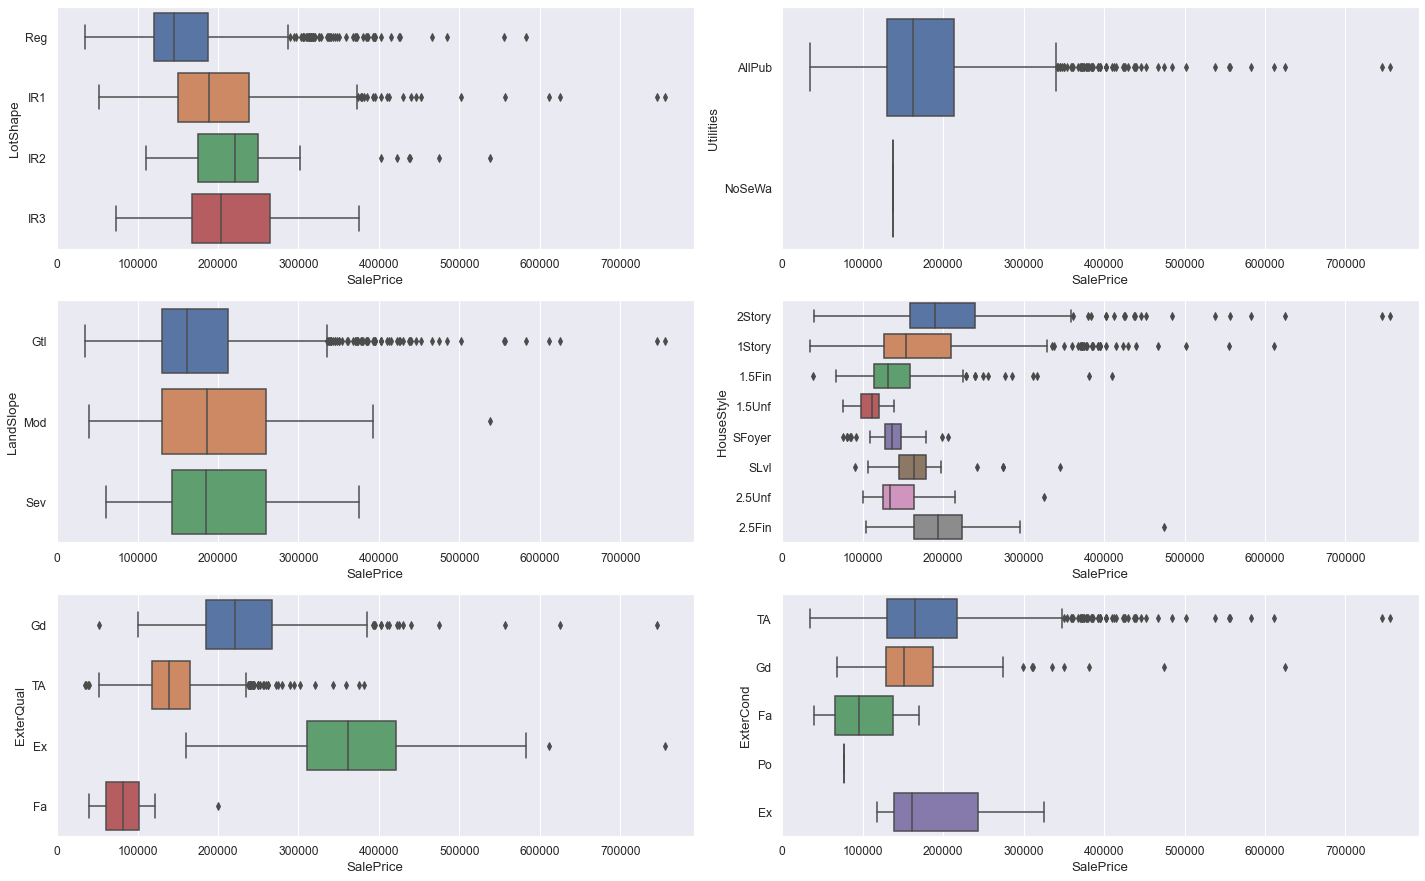

In [48]:
features_set1 = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

generate_boxplot(features_set1)

## Observation:
- 'LotShape' : Slightly irregular LotShape have the highest SalePrice
- 'Utilities' : Most of the houses in the dataset have all the public utilities
- 'LandSlope' : Houses at severe land slope have lowest SalePrice
- 'HouseStyle' : 2 storied houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

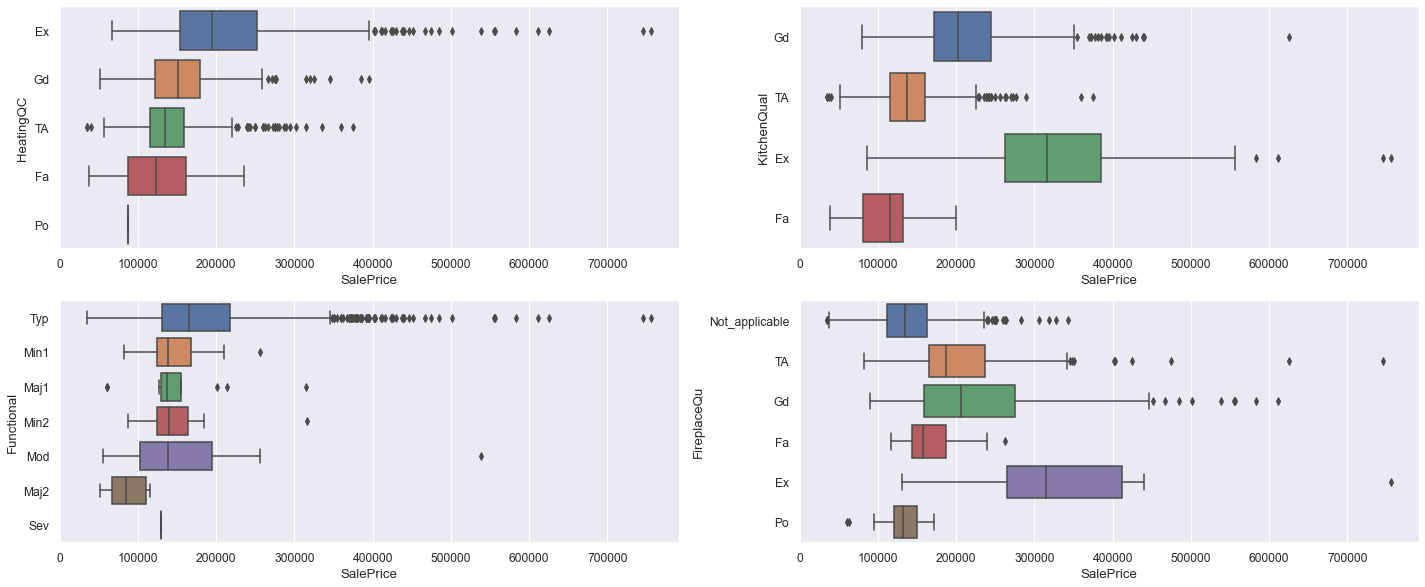

In [49]:
features_set2 = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(features_set2)

## Observation:
- Houses having excellent heating quality and kitchen quality have the highest SalePrice
- Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
- SalePrice range in largest for houses with average fireplace quality.

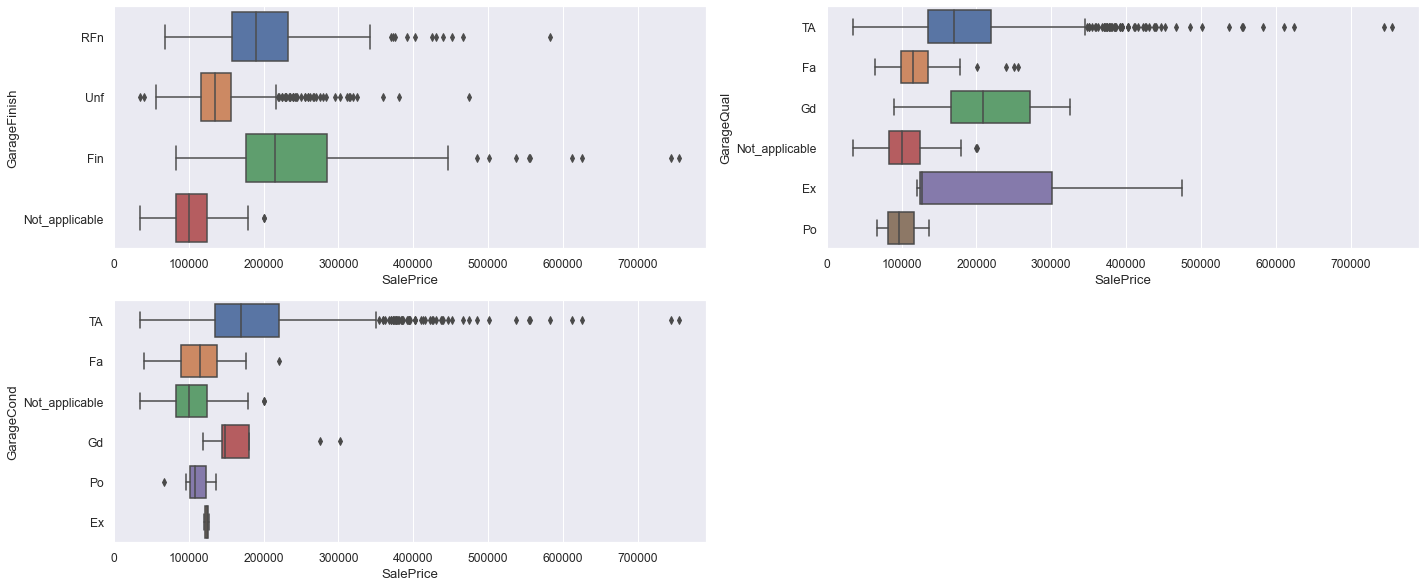

In [50]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond']

generate_boxplot(garage_features)

## Observation:
- SalePrice is highest where garage is finished.
- The range of SalePrice is widest for Typical/Average Garage quality and condition.
- There are very few houses with excellect condition of garage.

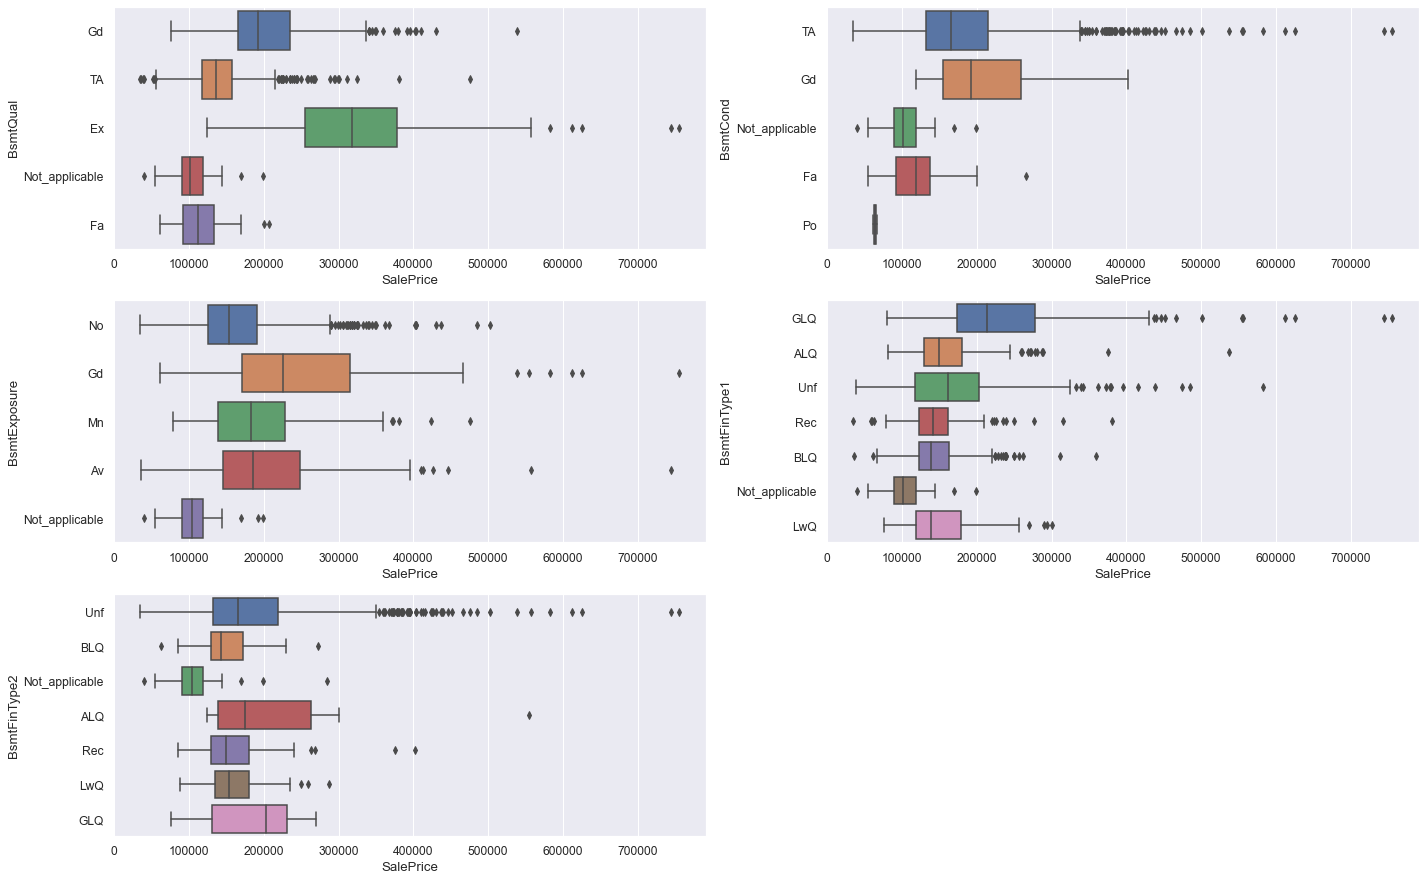

In [51]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(basement_features)

## Observation:
- Houses with excellent quality basement have the highest SalePrice
- Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
- A lot of houses have unfinished basment or no basement (label = Not_applicable)

## Mapping all ordered categorial column according to Data Dictionary

In [52]:
HPP['LotShape']      = HPP['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
HPP['Utilities']     = HPP['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
HPP['LandSlope']     = HPP['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
HPP['HouseStyle']    = HPP['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
HPP['ExterQual']     = HPP['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
HPP['ExterCond']     = HPP['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
HPP['BsmtQual']      = HPP['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
HPP['BsmtCond']      = HPP['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
HPP['BsmtExposure']  = HPP['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
HPP['BsmtFinType1']  = HPP['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
HPP['BsmtFinType2']  = HPP['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
HPP['HeatingQC']     = HPP['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
HPP['CentralAir']    = HPP['CentralAir'].map({'N':0,'Y':1})
HPP['KitchenQual']   = HPP['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
HPP['GarageFinish']  = HPP['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
HPP['GarageQual']    = HPP['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
HPP['GarageCond']    = HPP['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
HPP['Functional']    = HPP['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
HPP['FireplaceQu']   = HPP['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [53]:
HPP.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,Not_applicable,3,Lvl,3,Inside,...,Y,0,61,Not_applicable,Not_applicable,2,14,WD,Normal,208500
1,20,RL,80.0,9600.0,Pave,Not_applicable,3,Lvl,3,FR2,...,Y,298,0,Not_applicable,Not_applicable,5,15,WD,Normal,181500
2,60,RL,68.0,11250.0,Pave,Not_applicable,0,Lvl,3,Inside,...,Y,0,42,Not_applicable,Not_applicable,9,14,WD,Normal,223500
3,70,RL,60.0,9550.0,Pave,Not_applicable,0,Lvl,3,Corner,...,Y,0,35,Not_applicable,Not_applicable,2,16,WD,Abnorml,140000
4,60,RL,84.0,14260.0,Pave,Not_applicable,0,Lvl,3,FR2,...,Y,192,84,Not_applicable,Not_applicable,12,14,WD,Normal,250000


## Analyzing Unordered Feature and dealing with the help of dummy variable.

In [54]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

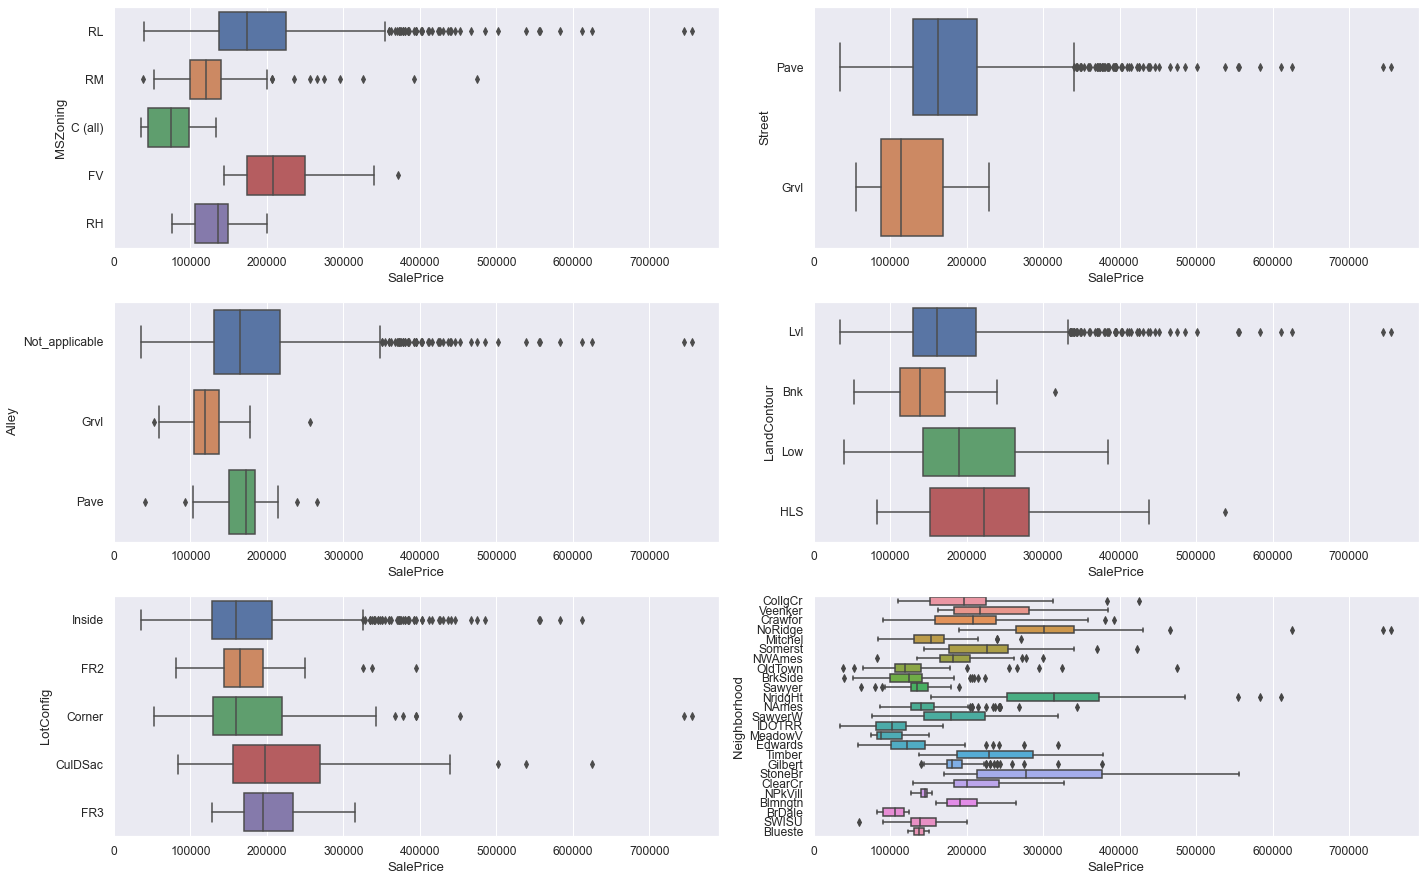

In [55]:
unordered_feat1 = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood']
generate_boxplot(unordered_feat1)

## Observation:
- Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice
- Most of the houses do not have alley
- Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
- street as pave have highest salePrice.


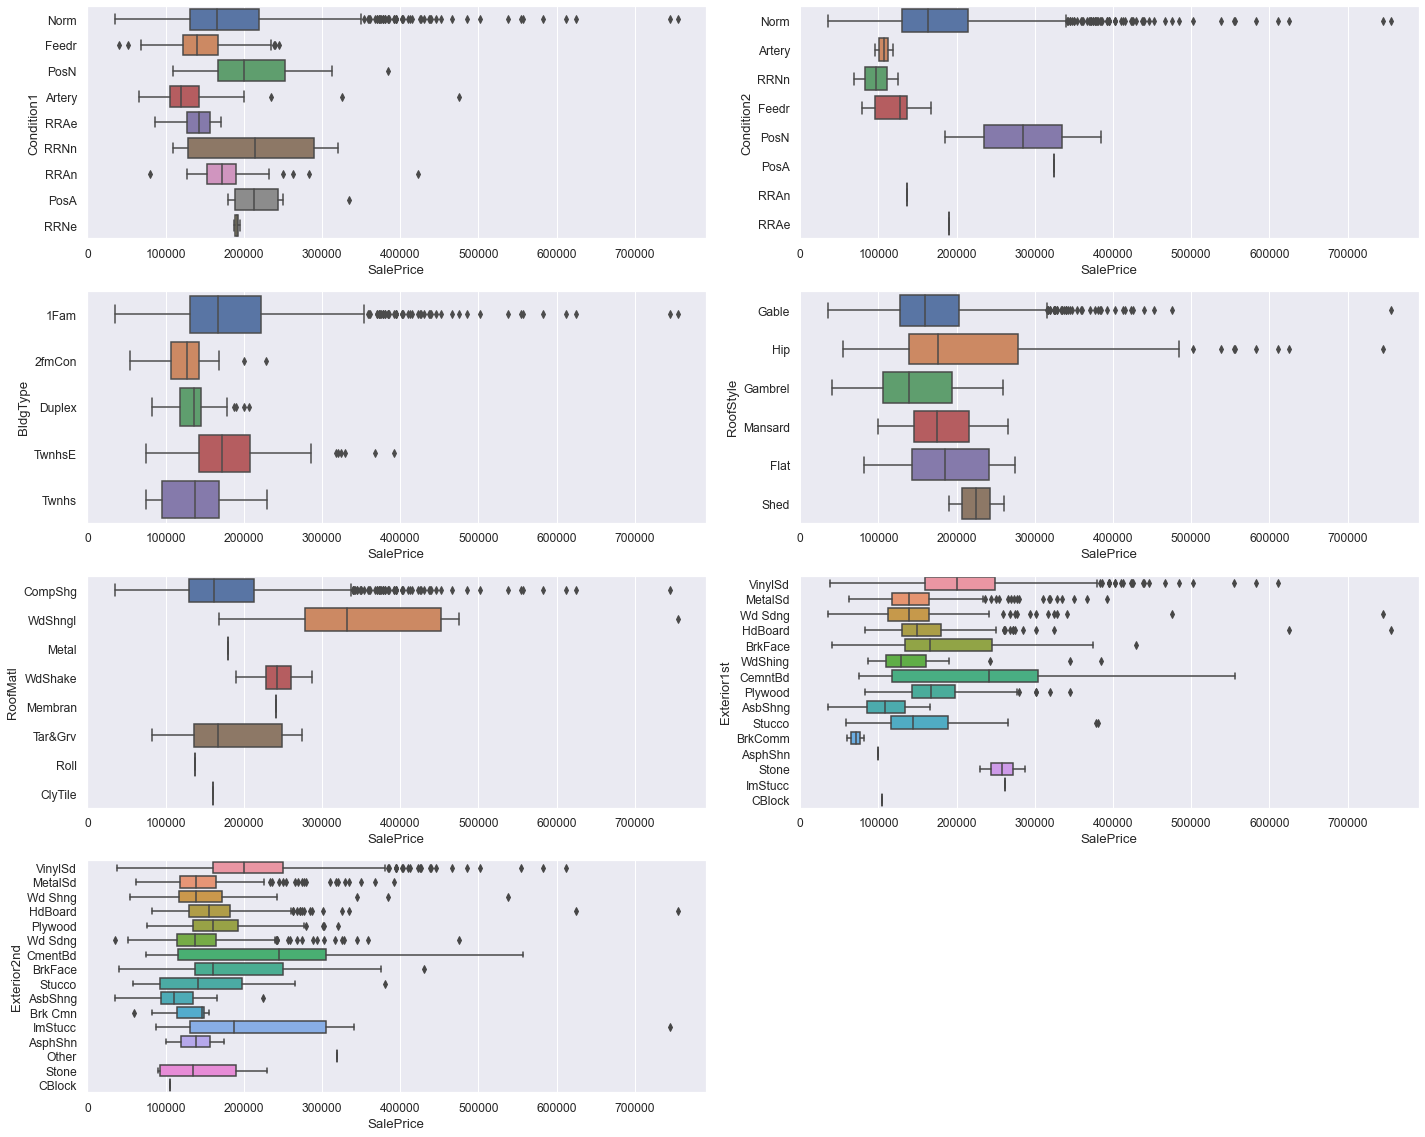

In [56]:
unordered_feature_set2 = ['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd']
generate_boxplot(unordered_feature_set2)

## Observation:
- Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice

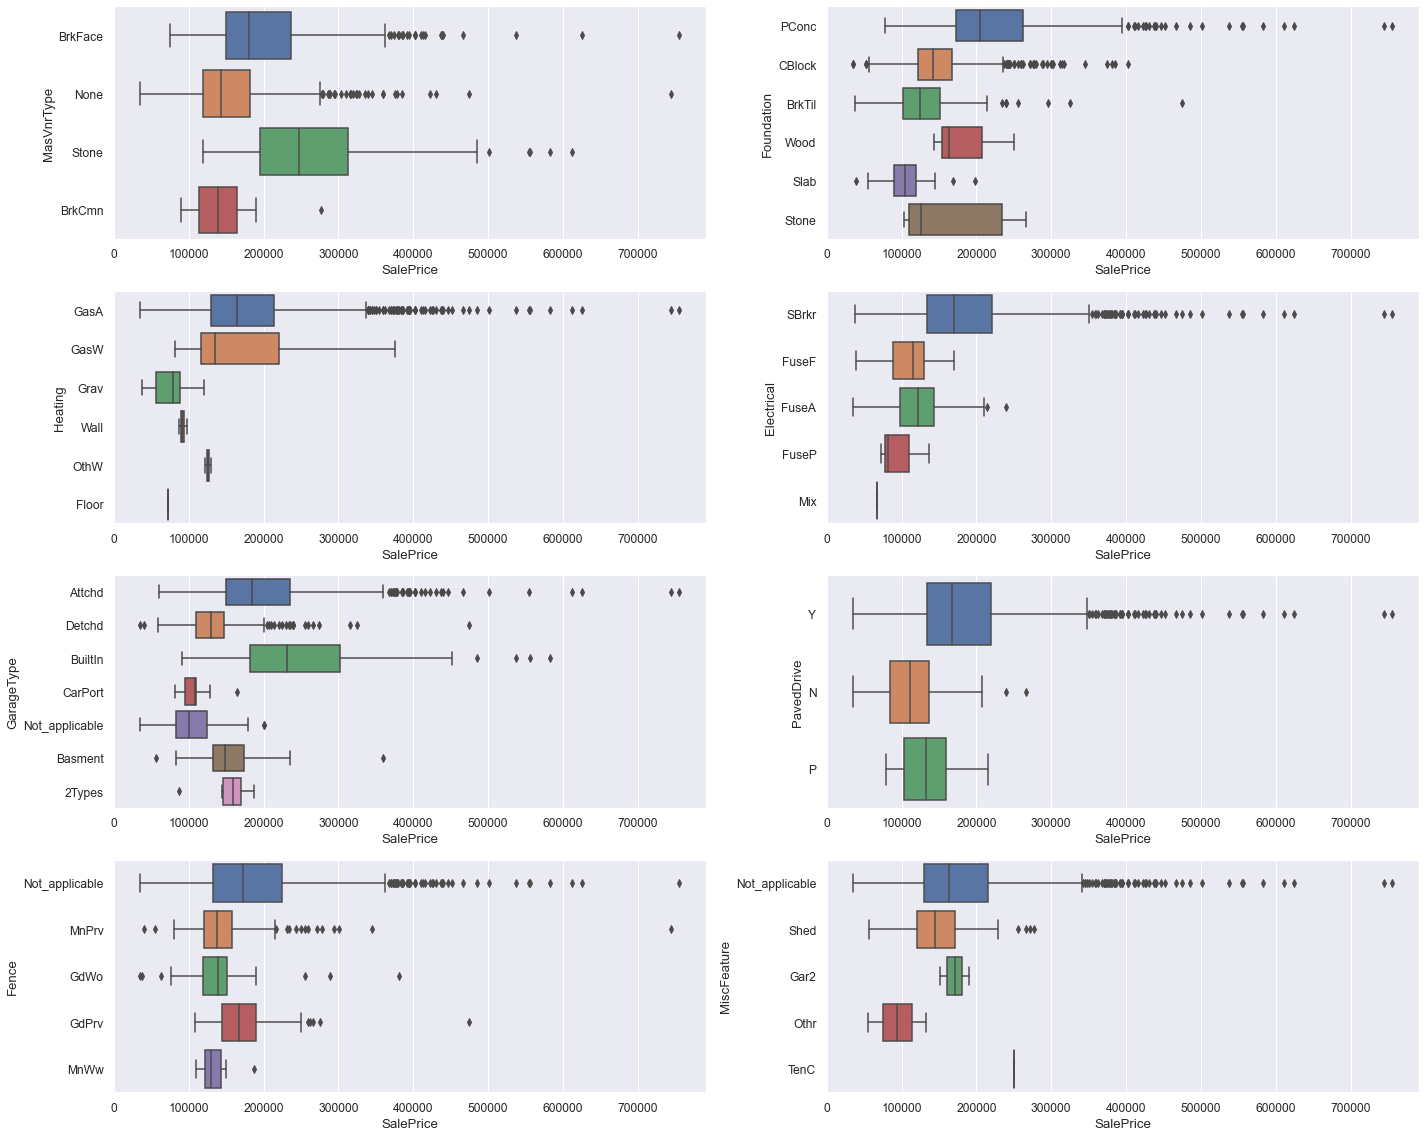

In [57]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

## Observation:
- Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price
- Houses with attached and built-in garage have high SalePrice
- Most of the houses do not have fence (Fence= Not_applicable)

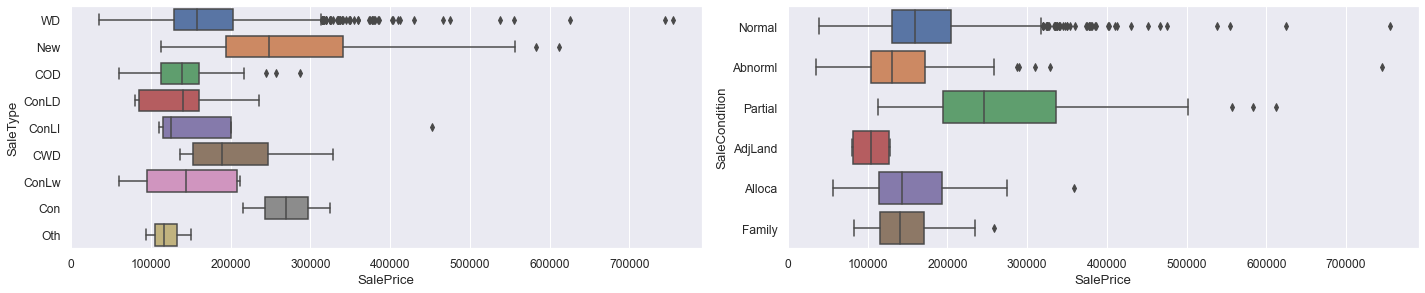

In [58]:
generate_boxplot(['SaleType','SaleCondition'])

## Observation:
- Most of the houses are newly built, houses with warranty deed have high SalePrice
- Sale condition = Normal leads to high SalePrice

In [59]:
# Mapping the ALl unordered Categorial variable
dummy_df = pd.get_dummies(HPP[unordered_features], drop_first=True)

In [60]:
dummy_df.shape

(1451, 144)

## Observation:
- 144 column getting add through dummy, and its not good to add in existing data frame as model becomes complex.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced
- will pick those column which has role in model variance

In [61]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

## As per above output we can see there are 92 column which has no contribution, Hence droping

In [62]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 52)


In [63]:
# Now almost data frame is ready need to merge with main data frame
HPP.shape

(1451, 68)

In [64]:
# Adding the dummy variables to the original dataframe
HPP = pd.concat([HPP,dummy_df],axis=1)

# Dropping the redundant columns
HPP = HPP.drop(unordered_features,axis=1)

In [65]:
HPP.shape

(1451, 97)

## Model Preperation start from Here, as EDA and DATA cleaning done

In [66]:
X = HPP.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,19,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,46,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,21,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,107,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,22,...,0,0,1,0,1,1,0,1,1,0


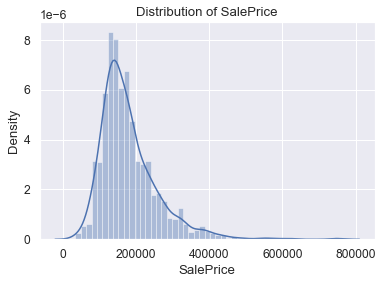

In [67]:
plt.title('Distribution of SalePrice')
sns.distplot(HPP['SalePrice'])
plt.show()

## As per Above plot 
- Since SalePrice is highly right skewed, need to check the distribution of transformed SalePrice

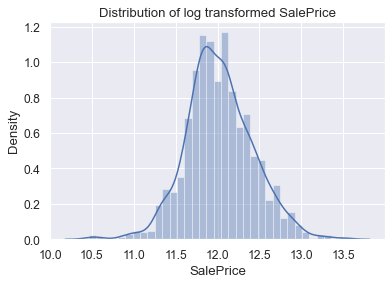

In [68]:
sns.distplot(np.log(HPP['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [69]:
# with the log , data looking normally distributed,hence transformed data will be used for model building

y = np.log(HPP['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [71]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1160, 96)
(1160,)
(291, 96)
(291,)


In [72]:
X['LotFrontage'].isnull().any()

True

In [73]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [74]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [75]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

In [76]:
# Feature Scaling
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [77]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [78]:
X_tr_scaled

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,-0.137941,-0.840191,-0.892882,0.747271,0.029374,-0.225421,0.179294,-0.787347,2.015381,2.859644,...,-0.605238,4.104407,-3.273709,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
1,2.389253,-2.335542,-1.956426,0.747271,0.029374,-0.225421,0.690305,0.689327,-0.563311,-1.112036,...,1.652242,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
2,-0.936002,0.062662,-0.450481,0.747271,0.029374,-0.225421,-0.842727,-0.787347,-0.563311,0.389860,...,-0.605238,-0.243641,0.305464,-0.342832,-2.005404,0.186522,-0.298667,0.385376,0.472894,-0.302078
3,-0.936002,0.000000,-0.396469,-1.386037,0.029374,-0.225421,-0.842727,-1.525684,-1.594788,-0.010646,...,-0.605238,4.104407,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
4,-0.936002,0.062662,-0.450481,0.747271,0.029374,-0.225421,-0.842727,-0.787347,0.468166,0.356484,...,1.652242,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,0.128080,0.683374,0.388382,-1.386037,0.029374,-0.225421,0.690305,0.689327,-0.563311,-0.778281,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
1156,2.389253,-2.335542,-2.214237,0.747271,0.029374,-0.225421,2.734348,-1.525684,-0.563311,-0.077397,...,-0.605238,-0.243641,0.305464,-0.342832,-2.005404,0.186522,-0.298667,0.385376,0.472894,-0.302078
1157,-0.137941,-1.065905,-0.152856,0.747271,0.029374,-0.225421,0.179294,-0.049010,0.468166,1.124120,...,1.652242,-0.243641,-3.273709,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
1158,-0.936002,-1.178761,0.302352,-0.674935,0.029374,-0.225421,-0.842727,1.427663,-0.563311,-1.078660,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078


In [79]:
X_te_scaled

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,-0.936002,0.626945,0.233027,0.747271,0.029374,-0.225421,-0.842727,1.427663,-0.563311,-1.112036,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
1,-0.936002,1.247657,1.279587,0.747271,0.029374,-0.225421,-0.842727,0.689327,1.499643,-0.444527,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,-5.361305,-0.298667,0.385376,0.472894,-0.302078
2,2.389253,0.344804,0.577983,0.747271,0.029374,-0.225421,-0.842727,-0.787347,-1.594788,0.189607,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
3,0.527110,1.304086,-1.121739,0.747271,0.029374,-0.225421,1.712326,-0.049010,0.468166,1.958507,...,-0.605238,4.104407,0.305464,2.916881,-2.005404,0.186522,-0.298667,0.385376,-2.114639,-0.302078
4,-0.936002,2.404438,2.261973,0.747271,0.029374,-0.225421,-0.842727,-0.787347,-1.594788,0.389860,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,-0.936002,0.626945,-0.083252,0.747271,0.029374,-0.225421,-0.842727,-0.787347,1.499643,0.556737,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
287,-0.936002,0.000000,0.875051,-1.386037,0.029374,-0.225421,-0.842727,1.427663,-0.563311,-0.711530,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
288,-0.936002,0.570517,-0.177913,0.747271,0.029374,-0.225421,-0.842727,-0.049010,0.468166,0.389860,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078
289,2.389253,-2.335542,-2.246116,0.747271,0.029374,-0.225421,2.223337,-1.525684,-1.594788,0.022730,...,-0.605238,-0.243641,0.305464,-0.342832,0.498653,0.186522,-0.298667,0.385376,0.472894,-0.302078


## As 96 Column have in dataframe, so wil go with Automated Feature selection using RFE

In [80]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [81]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF'

In [82]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features
import statsmodels.api as sm
def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())

In [83]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     268.5
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:52:11   Log-Likelihood:                 875.32
No. Observations:                1160   AIC:                            -1659.
Df Residuals:                    1114   BIC:                            -1426.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [84]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     244.3
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:52:11   Log-Likelihood:                 883.38
No. Observations:                1160   AIC:                            -1665.
Df Residuals:                    1109   BIC:                            -1407.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [85]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     231.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:52:11   Log-Likelihood:                 886.14
No. Observations:                1160   AIC:                            -1664.
Df Residuals:                    1106   BIC:                            -1391.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data

In [86]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [87]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

In [88]:
# Will perform Ridge with the help of above generic function
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 10.000000
ridge  Regression with  10.0
R2 score (train) :  0.9166751151617185
R2 score (test) :  0.8704201226046138
RMSE (train) :  0.11304414693007461
RMSE (test) :  0.15390088041290242


## Observation:
- with Ridge Regression model able to achieve R2 score of 0.87 on test data
- Root Mean Square Error = 0.1531 on test data, that means the prediction made by the model can off by 0.1531 unit.

In [89]:
#Lasso Regression 
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9157339730212566
R2 score (test) :  0.8745163217343286
RMSE (train) :  0.11368076274295139
RMSE (test) :  0.15144883684391258


## Comparing between Ridge and Lasso

In [90]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=10.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=10.0),Lasso (alpha=0.001)
LotFrontage,0.007800,0.005624
LotArea,0.030600,0.031021
LandSlope,0.009797,0.009664
OverallQual,0.078235,0.080717
OverallCond,0.048387,0.049037
YearBuilt,-0.040842,-0.041477
BsmtQual,0.022767,0.023370
BsmtExposure,0.009889,0.009376
BsmtFinSF1,0.025977,0.026318
HeatingQC,0.014794,0.014940


In [91]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[294197 224652 137065 118253 148074]


## Final Model
## With the Lasso Model R2 square value good on Test data as compared to Ridge

In [92]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
1stFlrSF,0.126662
2ndFlrSF,0.105968
OverallQual,0.080717
OverallCond,0.049037
SaleCondition_Partial,0.033529
LotArea,0.031021
SaleCondition_Normal,0.028205
BsmtFinSF1,0.026318
MSZoning_RL,0.026250
BsmtQual,0.023370


In [93]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond',
       'SaleCondition_Partial', 'LotArea', 'SaleCondition_Normal',
       'BsmtFinSF1', 'MSZoning_RL', 'BsmtQual'],
      dtype='object')

## Summary
- Load Train data set using pandas.
- Sepearted Numerical and Categorial Data based on type.
- SalePrice is the target column here.
- Analysed All data and did outlier and data cleaning
- Mapped all categorial ordered and unordered data.
- Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.
- Top 50 features are selected through RFE and adjusted R-square. 50 features : ['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']
- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. Optimum alpha = 10.0 for ridge and 0.0001 for lasso model.
- Model evaluation is done with R2 score and Root Mean Square Error.
- Lasso Regression is chosen as final model for having slightly better R-square value on test data.
- Out of 50 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF',       'OverallQual', 'OverallCond', 'SaleCondition_Partial', 'LotArea', 'BsmtFinSF1','SaleCondition_Normal', 'MSZoning_RL', 'Neighborhood_Somerst']
- Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable

## Assignment Question: 

In [94]:
ridge_model = Ridge(alpha=20.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=18.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=18.0
R2 score (train) :  0.9165
R2 score (test) :  0.8709
RMSE (train) :  0.1132
RMSE (test) :  0.1536


In [95]:
lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9146
R2 score (test) :  0.8759
RMSE (train) :  0.1144
RMSE (test) :  0.1506


In [96]:
model_coefficients['Ridge (alpha = 20.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=10.0),Lasso (alpha=0.001),Ridge (alpha = 20.0),Lasso (alpha = 0.002)
LotFrontage,0.007800,0.005624,0.008157,0.004615
LotArea,0.030600,0.031021,0.030998,0.031297
LandSlope,0.009797,0.009664,0.009740,0.008895
OverallQual,0.078235,0.080717,0.078339,0.083190
OverallCond,0.048387,0.049037,0.047556,0.047834
YearBuilt,-0.040842,-0.041477,-0.038739,-0.039811
BsmtQual,0.022767,0.023370,0.022967,0.024329
BsmtExposure,0.009889,0.009376,0.009926,0.008211
BsmtFinSF1,0.025977,0.026318,0.026145,0.026647
HeatingQC,0.014794,0.014940,0.015158,0.015546


In [97]:
model_coefficients.sort_values(by='Lasso (alpha = 0.002)', ascending=False).head(1)

,Ridge (alpha=10.0),Lasso (alpha=0.001),Ridge (alpha = 20.0),Lasso (alpha = 0.002)
1stFlrSF,0.125737,0.126662,0.122502,0.124616


In [98]:
model_coefficients.sort_values(by='Ridge (alpha = 20.0)', ascending=False).head(1)

,Ridge (alpha=10.0),Lasso (alpha=0.001),Ridge (alpha = 20.0),Lasso (alpha = 0.002)
1stFlrSF,0.125737,0.126662,0.122502,0.124616


In [99]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False).head(5)

,Ridge (alpha=10.0),Lasso (alpha=0.001),Ridge (alpha = 20.0),Lasso (alpha = 0.002)
1stFlrSF,0.125737,0.126662,0.122502,0.124616
2ndFlrSF,0.106067,0.105968,0.103016,0.102877
OverallQual,0.078235,0.080717,0.078339,0.083190
OverallCond,0.048387,0.049037,0.047556,0.047834
SaleCondition_Partial,0.034283,0.033529,0.033619,0.031926


In [100]:
# After dropping the above top 5 and building new model
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [101]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [102]:
alpha = 0.001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [103]:
lasso_model.coef_

array([ 0.01880608,  0.06079821,  0.00397221,  0.00473366,  0.04482833,
        0.00992872,  0.0347399 ,  0.03219002,  0.02038917, -0.00084884,
        0.03917791,  0.0632533 , -0.02098502,  0.06026318,  0.01691681,
        0.07753768,  0.        ,  0.02314918,  0.0244498 ,  0.01973771,
        0.01009498, -0.02106655, -0.0234071 ,  0.01577047,  0.02186803,
        0.        ,  0.01254899,  0.00422866, -0.02291913,  0.        ,
       -0.01989069, -0.00279403, -0.02792217,  0.0037202 ,  0.0233465 ,
        0.01544184, -0.        ,  0.01789706,  0.02985072, -0.01899286,
        0.00581641, -0.00618588,  0.00685584,  0.01059838,  0.00844591])

In [104]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
GarageArea,0.077538
KitchenQual,0.063253
LotArea,0.060798
Fireplaces,0.060263
BsmtQual,0.044828
